PROJECTE FINAL: classificació d'imatges CNN amb Keras

In [15]:
import numpy as np
import pandas as pd
import os
import random
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

Dataset Places utilitzarem les imatges que conte "A", totes les imatges tenen el mateix tamany i són .jpg  pre-processarem les imatges les passarem  a un rang (0,1), i tamany 128x128 i despres les dividirem en train, test i validació. 70%,20% i 10%

In [5]:
train_path = '/Users/esthersanroma/IT_ACADEMY/directory/train/a'
test_path = '/Users/esthersanroma/IT_ACADEMY/directory/test/a'
val_path = '/Users/esthersanroma/IT_ACADEMY/directory/validation/a'

# 
train_datagen = ImageDataGenerator(
    rescale=1./255)
    
# Càrrega les imatges de train i aplica la transformació d'aument de dades
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

# Càrrega les imatges de test i validació i normalitza els píxels
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')





Found 6380 images belonging to 14 classes.
Found 1821 images belonging to 14 classes.
Found 924 images belonging to 14 classes.


In [31]:
#print(X_train.shape)
#print(y_train.shape)
#print(X_val.shape)
#print(y_val.shape)

(32, 128, 128, 3)
(32, 14)
(32, 128, 128, 3)
(32, 14)


Ja tenim les imatges dividides, train=6380 imatges, Test=1821 imatges i Validació=924 imatges, totes 3 tenen 14 classes. Farem el primer model per entrenar les dades, aquest primer model te 4 capes Conv, hem utilitzat tambè kernel_regularizer. Hem entrenat 100 epochs

In [6]:
from tensorflow.keras import regularizers

model2 = Sequential()
# Primera capa de convolució
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D((2, 2)))

# Segona capa de convolució
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

# Tercera capa de convolució
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(MaxPooling2D((2, 2)))

# Quarta capa de convolució
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(14, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

In [15]:
import os
# Defineix la ruta on es guardaran els models
save_dir = "/Users/esthersanroma/IT_ACADEMY/Models"
model_name = "model26.h5"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Defineix el callback ModelCheckpoint per guardar els models
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Entrena el model amb el callback ModelCheckpoint
history = model2.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=val_generator, validation_steps=len(val_generator), callbacks=[checkpoint])

Epoch 1/100


2023-04-14 08:36:03.296311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 1.2986 - accuracy: 0.6915

2023-04-14 08:38:29.878662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.35606, saving model to /Users/esthersanroma/IT_ACADEMY/Models/model26.h5
200/200 [==============================] - 152s 759ms/step - loss: 1.2986 - accuracy: 0.6915 - val_loss: 2.7700 - val_accuracy: 0.3561
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 1.2717 - accuracy: 0.7013
Epoch 2: val_accuracy did not improve from 0.35606
200/200 [==============================] - 151s 755ms/step - loss: 1.2717 - accuracy: 0.7013 - val_loss: 2.8305 - val_accuracy: 0.3323
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 1.2608 - accuracy: 0.7050
Epoch 3: val_accuracy did not improve from 0.35606
200/200 [==============================] - 148s 737ms/step - loss: 1.2608 - accuracy: 0.7050 - val_loss: 2.8187 - val_accuracy: 0.3539
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 1.2467 - accuracy: 0.7168
Epoch 4: val_accuracy did not improve from 0.35606
200/200 [======================

Epoch 30/100
200/200 [==============================] - ETA: 0s - loss: 0.9832 - accuracy: 0.8368
Epoch 30: val_accuracy did not improve from 0.35823
200/200 [==============================] - 156s 777ms/step - loss: 0.9832 - accuracy: 0.8368 - val_loss: 3.9122 - val_accuracy: 0.3247
Epoch 31/100
200/200 [==============================] - ETA: 0s - loss: 0.9593 - accuracy: 0.8480
Epoch 31: val_accuracy did not improve from 0.35823
200/200 [==============================] - 148s 738ms/step - loss: 0.9593 - accuracy: 0.8480 - val_loss: 3.8789 - val_accuracy: 0.3258
Epoch 32/100
200/200 [==============================] - ETA: 0s - loss: 0.9529 - accuracy: 0.8472
Epoch 32: val_accuracy did not improve from 0.35823
200/200 [==============================] - 147s 736ms/step - loss: 0.9529 - accuracy: 0.8472 - val_loss: 4.0940 - val_accuracy: 0.3193
Epoch 33/100
200/200 [==============================] - ETA: 0s - loss: 0.9834 - accuracy: 0.8365
Epoch 33: val_accuracy did not improve from 0.3

Epoch 59/100
200/200 [==============================] - ETA: 0s - loss: 0.8754 - accuracy: 0.8815
Epoch 59: val_accuracy did not improve from 0.35823
200/200 [==============================] - 148s 739ms/step - loss: 0.8754 - accuracy: 0.8815 - val_loss: 4.5209 - val_accuracy: 0.3323
Epoch 60/100
200/200 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.8793
Epoch 60: val_accuracy did not improve from 0.35823
200/200 [==============================] - 148s 740ms/step - loss: 0.8767 - accuracy: 0.8793 - val_loss: 4.5896 - val_accuracy: 0.3377
Epoch 61/100
200/200 [==============================] - ETA: 0s - loss: 0.8970 - accuracy: 0.8735
Epoch 61: val_accuracy did not improve from 0.35823
200/200 [==============================] - 146s 732ms/step - loss: 0.8970 - accuracy: 0.8735 - val_loss: 4.3573 - val_accuracy: 0.3323
Epoch 62/100
200/200 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.8950
Epoch 62: val_accuracy did not improve from 0.3

Epoch 88/100
200/200 [==============================] - ETA: 0s - loss: 0.8173 - accuracy: 0.8966
Epoch 88: val_accuracy did not improve from 0.35823
200/200 [==============================] - 153s 766ms/step - loss: 0.8173 - accuracy: 0.8966 - val_loss: 4.7513 - val_accuracy: 0.3247
Epoch 89/100
200/200 [==============================] - ETA: 0s - loss: 0.8343 - accuracy: 0.8887
Epoch 89: val_accuracy did not improve from 0.35823
200/200 [==============================] - 150s 748ms/step - loss: 0.8343 - accuracy: 0.8887 - val_loss: 4.9616 - val_accuracy: 0.3182
Epoch 90/100
200/200 [==============================] - ETA: 0s - loss: 0.8280 - accuracy: 0.8948
Epoch 90: val_accuracy did not improve from 0.35823
200/200 [==============================] - 158s 789ms/step - loss: 0.8280 - accuracy: 0.8948 - val_loss: 5.0363 - val_accuracy: 0.3377
Epoch 91/100
200/200 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.9058
Epoch 91: val_accuracy did not improve from 0.3

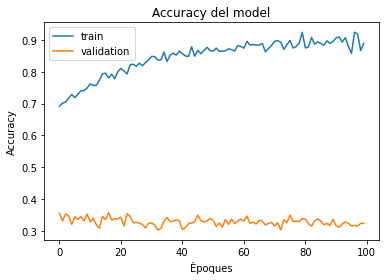

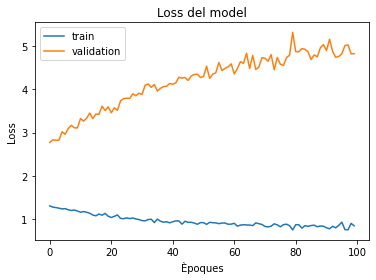

In [16]:
# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
test_loss, test_accuracy = model2.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))



2023-04-14 13:13:15.303920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 5.2789 accuracy: 0.3125


In [18]:
from tensorflow.keras.models import load_model

# Càrrega del model
saved_model = load_model('/Users/esthersanroma/IT_ACADEMY/Models/model26.h5')

# Evaluació del model carregat amb dades de prova
test_loss, test_accuracy = saved_model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))



2023-04-14 13:15:24.998345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 3.6065 accuracy: 0.3328


El primer model , els resultats no són satisfactoris, Test loss: 3.6065 accuracy: 0.3328, l'hem entrenat en diferents epochs i no hem conseguit millora el resultat. Canviarem els parametres de la CNN per millora el model.

In [19]:
predictions = model2.predict_generator(test_generator)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = test_generator.labels[:25]
print(first20_preds)
print(first20_true)

2023-04-14 13:16:36.638472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[ 8 12  6  4  0  5 10  1  2  9  1  1  9  0  0 12  3  8  6 12 13  8  7  4
  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
np.argmax(predictions, axis=1)

array([ 0, 10, 12, ...,  2, 10, 13])

In [69]:
test_generator.labels

array([ 0,  0,  0, ..., 13, 13, 13], dtype=int32)

In [77]:
test_generator.class_indices

{'abbey': 0,
 'airport_terminal': 1,
 'alley': 2,
 'amphitheater': 3,
 'amusement_park': 4,
 'apartment_building': 5,
 'aquarium': 6,
 'aqueduct': 7,
 'arch': 8,
 'art_gallery': 9,
 'art_studio': 10,
 'assembly_line': 11,
 'attic': 12,
 'auditorium': 13}

[Text(0.5, 1.0, 'Confusion matrix')]

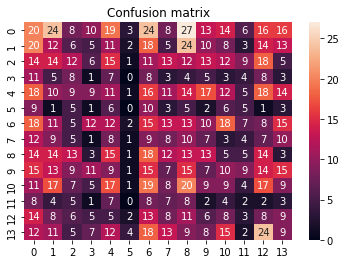

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(test_generator.labels, np.argmax(predictions, axis=1),labels=range(0,14))
sns.heatmap(cf_matrix, annot=True, fmt="d").set(title='Confusion matrix')

El model seguent que utilitzarem es igual que l'anterior pero amb dropout=0,2, 4 capes Conv, kernel_regularizer.

In [15]:
from tensorflow.keras import regularizers

modell2 = Sequential()
# Primera capa de convolució
modell2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
modell2.add(MaxPooling2D((2, 2)))

# Segona capa de convolució
modell2.add(Conv2D(64, (3, 3), activation='relu'))
modell2.add(MaxPooling2D((2, 2)))

# Tercera capa de convolució
modell2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modell2.add(MaxPooling2D((2, 2)))

# Quarta capa de convolució
modell2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modell2.add(MaxPooling2D((2, 2)))

modell2.add(Flatten())
modell2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modell2.add(Dropout(0.2))
modell2.add(Dense(14, activation='softmax'))

modell2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modell2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [17]:
import os
# Defineix la ruta on es guardaran els models
save_dir = "/Users/esthersanroma/IT_ACADEMY/Models"
model_name = "modell27.h5"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Defineix el callback ModelCheckpoint per guardar els models
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Entrena el model amb el callback ModelCheckpoint
history2 = modell2.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=val_generator, validation_steps=len(val_generator), callbacks=[checkpoint])

Epoch 1/100


2023-04-15 15:44:58.518315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 2.7225 - accuracy: 0.1531

2023-04-15 15:47:33.097204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.20563, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 162s 804ms/step - loss: 2.7225 - accuracy: 0.1531 - val_loss: 2.4162 - val_accuracy: 0.2056
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 2.4148 - accuracy: 0.2127
Epoch 2: val_accuracy improved from 0.20563 to 0.23485, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 151s 753ms/step - loss: 2.4148 - accuracy: 0.2127 - val_loss: 2.3452 - val_accuracy: 0.2348
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 2.3556 - accuracy: 0.2384
Epoch 3: val_accuracy improved from 0.23485 to 0.24026, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 149s 743ms/step - loss: 2.3556 - accuracy: 0.2384 - val_loss: 2.3076 - val_accuracy: 0.2403
Epoch 4/100
200/200 [=============

Epoch 27/100
200/200 [==============================] - ETA: 0s - loss: 1.9554 - accuracy: 0.4000
Epoch 27: val_accuracy did not improve from 0.39286
200/200 [==============================] - 148s 739ms/step - loss: 1.9554 - accuracy: 0.4000 - val_loss: 1.9922 - val_accuracy: 0.3777
Epoch 28/100
200/200 [==============================] - ETA: 0s - loss: 1.9544 - accuracy: 0.3939
Epoch 28: val_accuracy improved from 0.39286 to 0.39719, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 148s 738ms/step - loss: 1.9544 - accuracy: 0.3939 - val_loss: 1.9290 - val_accuracy: 0.3972
Epoch 29/100
200/200 [==============================] - ETA: 0s - loss: 1.9478 - accuracy: 0.3969
Epoch 29: val_accuracy did not improve from 0.39719
200/200 [==============================] - 148s 741ms/step - loss: 1.9478 - accuracy: 0.3969 - val_loss: 1.9546 - val_accuracy: 0.3766
Epoch 30/100
200/200 [==============================] - ETA: 0s - loss: 1

200/200 [==============================] - 145s 725ms/step - loss: 1.7588 - accuracy: 0.4737 - val_loss: 1.8961 - val_accuracy: 0.4221
Epoch 55/100
200/200 [==============================] - ETA: 0s - loss: 1.7350 - accuracy: 0.4839
Epoch 55: val_accuracy improved from 0.42316 to 0.43182, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 145s 723ms/step - loss: 1.7350 - accuracy: 0.4839 - val_loss: 1.8803 - val_accuracy: 0.4318
Epoch 56/100
200/200 [==============================] - ETA: 0s - loss: 1.7378 - accuracy: 0.4848
Epoch 56: val_accuracy improved from 0.43182 to 0.43506, saving model to /Users/esthersanroma/IT_ACADEMY/Models/modell27.h5
200/200 [==============================] - 156s 782ms/step - loss: 1.7378 - accuracy: 0.4848 - val_loss: 1.8888 - val_accuracy: 0.4351
Epoch 57/100
200/200 [==============================] - ETA: 0s - loss: 1.7162 - accuracy: 0.4951
Epoch 57: val_accuracy improved from 0.43506 to 0.437

200/200 [==============================] - ETA: 0s - loss: 1.5533 - accuracy: 0.5774
Epoch 82: val_accuracy did not improve from 0.45022
200/200 [==============================] - 154s 769ms/step - loss: 1.5533 - accuracy: 0.5774 - val_loss: 2.2165 - val_accuracy: 0.4102
Epoch 83/100
200/200 [==============================] - ETA: 0s - loss: 1.5400 - accuracy: 0.5771
Epoch 83: val_accuracy did not improve from 0.45022
200/200 [==============================] - 154s 770ms/step - loss: 1.5400 - accuracy: 0.5771 - val_loss: 2.1876 - val_accuracy: 0.4351
Epoch 84/100
200/200 [==============================] - ETA: 0s - loss: 1.5320 - accuracy: 0.5815
Epoch 84: val_accuracy did not improve from 0.45022
200/200 [==============================] - 155s 774ms/step - loss: 1.5320 - accuracy: 0.5815 - val_loss: 2.1246 - val_accuracy: 0.4264
Epoch 85/100
200/200 [==============================] - ETA: 0s - loss: 1.5272 - accuracy: 0.5871
Epoch 85: val_accuracy did not improve from 0.45022
200/200 

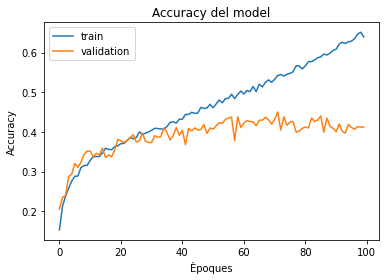

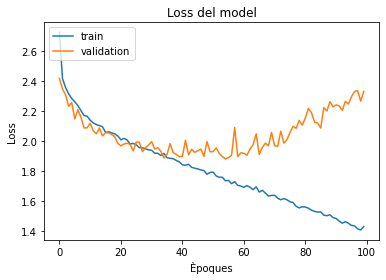

In [20]:
# Visualitzar accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
test_loss, test_accuracy = modell2.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

2023-04-15 20:25:34.554205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 2.4361 accuracy: 0.4053


In [26]:
# Càrrega del model
saved_model = load_model('/Users/esthersanroma/IT_ACADEMY/Models/modell27.h5')

# Evaluació del model carregat amb dades de prova
test_loss, test_accuracy = saved_model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))



2023-04-15 20:25:53.829552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 2.0337 accuracy: 0.4239


Aquest model ha millorat el resultat de l'anterior model però no ha millorat el suficient, hem probat diferents num de epochs i els resultats no han sigut superiors. Probarem de millora la xarxa CNN que tenim actual.

In [29]:
predictions_model = modell2.predict_generator(test_generator)
first20_preds = np.argmax(predictions_model, axis=1)[:25]
first20_true = test_generator.labels[:25]
print(first20_preds)
print(first20_true)

2023-04-15 20:29:16.348927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[ 3  9  0 10  3  0  7  0 13  4  0  0  8  9  0  0  0 13  9 10 10 10  6  1
 12]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[Text(0.5, 1.0, 'Confusion matrix')]

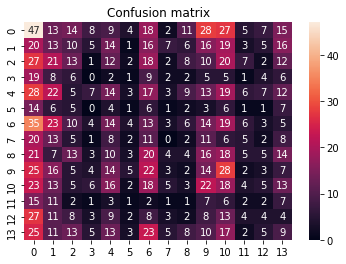

In [32]:
cf_matrix = confusion_matrix(test_generator.labels, np.argmax(predictions_model, axis=1),labels=range(0,14))
sns.heatmap(cf_matrix, annot=True, fmt="d").set(title='Confusion matrix')

Al seguent model probarem el mateix però posarem una capa de normalització, BatchNormalization també pot ser beneficiós per reduir l'overfitting, ja que ajuda a regularitzar els pesos i a evitar que esdevinguin massa grans ajuda a normalitzar les dades a cada capa del model, la qual cosa pot millorar la velocitat de convergència i la precisió del model i aumentarem el numero de epochs. 

In [10]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

model3 = Sequential()

# Primera capa de convolució
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

# Segona capa de convolució
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

# Tercera capa de convolució
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

# Quarta capa de convolució
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(14, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

In [11]:
# Defineix la ruta on es guardaran els models
save_dir = "/Users/esthersanroma/IT_ACADEMY/Models"
model_name = "model30.h5"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Defineix el callback ModelCheckpoint per guardar els models
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Entrena el model amb el callback ModelCheckpoint
history3 = model3.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=200, validation_data=val_generator, validation_steps=len(val_generator), callbacks=[checkpoint])

Epoch 1/200


2023-04-15 23:37:28.865074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 10.0208 - accuracy: 0.2536

2023-04-15 23:40:58.121523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.08117, saving model to /Users/esthersanroma/IT_ACADEMY/Models/model30.h5
200/200 [==============================] - 219s 1s/step - loss: 10.0208 - accuracy: 0.2536 - val_loss: 7.6495 - val_accuracy: 0.0812
Epoch 2/200
200/200 [==============================] - ETA: 0s - loss: 4.8107 - accuracy: 0.3307
Epoch 2: val_accuracy improved from 0.08117 to 0.16558, saving model to /Users/esthersanroma/IT_ACADEMY/Models/model30.h5
200/200 [==============================] - 912s 5s/step - loss: 4.8107 - accuracy: 0.3307 - val_loss: 5.8404 - val_accuracy: 0.1656
Epoch 3/200
200/200 [==============================] - ETA: 0s - loss: 3.5106 - accuracy: 0.3688
Epoch 3: val_accuracy improved from 0.16558 to 0.28247, saving model to /Users/esthersanroma/IT_ACADEMY/Models/model30.h5
200/200 [==============================] - 214s 1s/step - loss: 3.5106 - accuracy: 0.3688 - val_loss: 3.7326 - val_accuracy: 0.2825
Epoch 4/200
200/200 [========================

Epoch 28/200
200/200 [==============================] - ETA: 0s - loss: 1.9196 - accuracy: 0.7926
Epoch 28: val_accuracy did not improve from 0.44481
200/200 [==============================] - 209s 1s/step - loss: 1.9196 - accuracy: 0.7926 - val_loss: 3.5730 - val_accuracy: 0.4167
Epoch 29/200
200/200 [==============================] - ETA: 0s - loss: 1.8474 - accuracy: 0.8110
Epoch 29: val_accuracy did not improve from 0.44481
200/200 [==============================] - 209s 1s/step - loss: 1.8474 - accuracy: 0.8110 - val_loss: 3.7846 - val_accuracy: 0.4134
Epoch 30/200
200/200 [==============================] - ETA: 0s - loss: 1.7875 - accuracy: 0.8249
Epoch 30: val_accuracy did not improve from 0.44481
200/200 [==============================] - 207s 1s/step - loss: 1.7875 - accuracy: 0.8249 - val_loss: 4.1525 - val_accuracy: 0.3831
Epoch 31/200
200/200 [==============================] - ETA: 0s - loss: 1.8595 - accuracy: 0.8122
Epoch 31: val_accuracy did not improve from 0.44481
200/

Epoch 57/200
200/200 [==============================] - ETA: 0s - loss: 1.4998 - accuracy: 0.8801
Epoch 57: val_accuracy did not improve from 0.47078
200/200 [==============================] - 213s 1s/step - loss: 1.4998 - accuracy: 0.8801 - val_loss: 3.7926 - val_accuracy: 0.4156
Epoch 58/200
200/200 [==============================] - ETA: 0s - loss: 1.5581 - accuracy: 0.8618
Epoch 58: val_accuracy did not improve from 0.47078
200/200 [==============================] - 207s 1s/step - loss: 1.5581 - accuracy: 0.8618 - val_loss: 4.0437 - val_accuracy: 0.4351
Epoch 59/200
200/200 [==============================] - ETA: 0s - loss: 1.5804 - accuracy: 0.8666
Epoch 59: val_accuracy did not improve from 0.47078
200/200 [==============================] - 207s 1s/step - loss: 1.5804 - accuracy: 0.8666 - val_loss: 3.9227 - val_accuracy: 0.4383
Epoch 60/200
200/200 [==============================] - ETA: 0s - loss: 1.5898 - accuracy: 0.8629
Epoch 60: val_accuracy did not improve from 0.47078
200/

Epoch 86/200
200/200 [==============================] - ETA: 0s - loss: 1.4002 - accuracy: 0.9038
Epoch 86: val_accuracy did not improve from 0.47186
200/200 [==============================] - 200s 1000ms/step - loss: 1.4002 - accuracy: 0.9038 - val_loss: 4.0743 - val_accuracy: 0.4199
Epoch 87/200
200/200 [==============================] - ETA: 0s - loss: 1.3585 - accuracy: 0.8989
Epoch 87: val_accuracy did not improve from 0.47186
200/200 [==============================] - 200s 1s/step - loss: 1.3585 - accuracy: 0.8989 - val_loss: 3.7473 - val_accuracy: 0.4199
Epoch 88/200
200/200 [==============================] - ETA: 0s - loss: 1.3969 - accuracy: 0.8878
Epoch 88: val_accuracy did not improve from 0.47186
200/200 [==============================] - 201s 1s/step - loss: 1.3969 - accuracy: 0.8878 - val_loss: 3.8610 - val_accuracy: 0.4665
Epoch 89/200
200/200 [==============================] - ETA: 0s - loss: 1.4108 - accuracy: 0.8868
Epoch 89: val_accuracy did not improve from 0.47186


Epoch 115/200
200/200 [==============================] - ETA: 0s - loss: 1.2154 - accuracy: 0.9176
Epoch 115: val_accuracy did not improve from 0.47619
200/200 [==============================] - 207s 1s/step - loss: 1.2154 - accuracy: 0.9176 - val_loss: 3.7627 - val_accuracy: 0.4242
Epoch 116/200
200/200 [==============================] - ETA: 0s - loss: 1.3440 - accuracy: 0.8804
Epoch 116: val_accuracy did not improve from 0.47619
200/200 [==============================] - 203s 1s/step - loss: 1.3440 - accuracy: 0.8804 - val_loss: 4.1530 - val_accuracy: 0.4426
Epoch 117/200
200/200 [==============================] - ETA: 0s - loss: 1.5657 - accuracy: 0.8513
Epoch 117: val_accuracy did not improve from 0.47619
200/200 [==============================] - 202s 1s/step - loss: 1.5657 - accuracy: 0.8513 - val_loss: 4.0508 - val_accuracy: 0.4275
Epoch 118/200
200/200 [==============================] - ETA: 0s - loss: 1.5357 - accuracy: 0.8741
Epoch 118: val_accuracy did not improve from 0.47

Epoch 144/200
200/200 [==============================] - ETA: 0s - loss: 1.3741 - accuracy: 0.8980
Epoch 144: val_accuracy did not improve from 0.47619
200/200 [==============================] - 202s 1s/step - loss: 1.3741 - accuracy: 0.8980 - val_loss: 3.9329 - val_accuracy: 0.4394
Epoch 145/200
200/200 [==============================] - ETA: 0s - loss: 1.3201 - accuracy: 0.9067
Epoch 145: val_accuracy did not improve from 0.47619
200/200 [==============================] - 201s 1s/step - loss: 1.3201 - accuracy: 0.9067 - val_loss: 3.9330 - val_accuracy: 0.4351
Epoch 146/200
200/200 [==============================] - ETA: 0s - loss: 1.1791 - accuracy: 0.9273
Epoch 146: val_accuracy did not improve from 0.47619
200/200 [==============================] - 202s 1s/step - loss: 1.1791 - accuracy: 0.9273 - val_loss: 3.4591 - val_accuracy: 0.4470
Epoch 147/200
200/200 [==============================] - ETA: 0s - loss: 1.1566 - accuracy: 0.9197
Epoch 147: val_accuracy did not improve from 0.47

Epoch 173/200
200/200 [==============================] - ETA: 0s - loss: 1.2056 - accuracy: 0.9166
Epoch 173: val_accuracy did not improve from 0.47619
200/200 [==============================] - 208s 1s/step - loss: 1.2056 - accuracy: 0.9166 - val_loss: 4.0622 - val_accuracy: 0.4199
Epoch 174/200
200/200 [==============================] - ETA: 0s - loss: 1.2044 - accuracy: 0.9075
Epoch 174: val_accuracy did not improve from 0.47619
200/200 [==============================] - 209s 1s/step - loss: 1.2044 - accuracy: 0.9075 - val_loss: 3.7954 - val_accuracy: 0.4351
Epoch 175/200
200/200 [==============================] - ETA: 0s - loss: 1.3045 - accuracy: 0.8926
Epoch 175: val_accuracy did not improve from 0.47619
200/200 [==============================] - 209s 1s/step - loss: 1.3045 - accuracy: 0.8926 - val_loss: 3.8690 - val_accuracy: 0.4286
Epoch 176/200
200/200 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.8817
Epoch 176: val_accuracy did not improve from 0.47

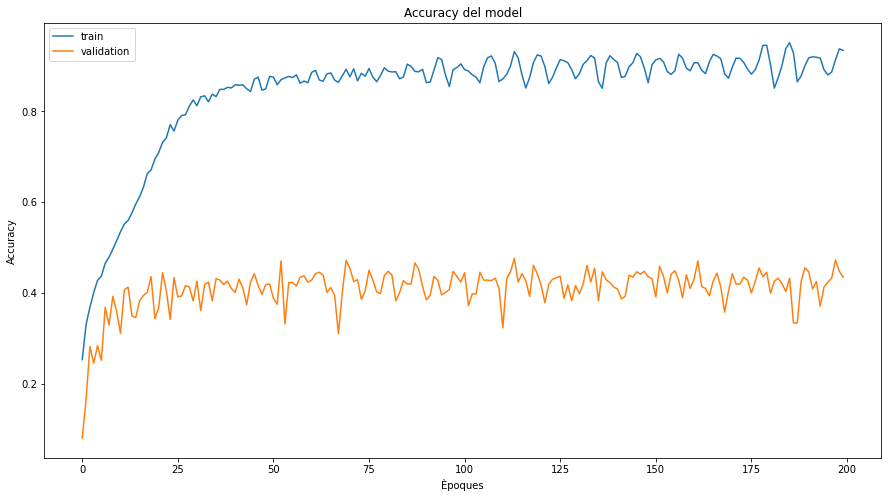

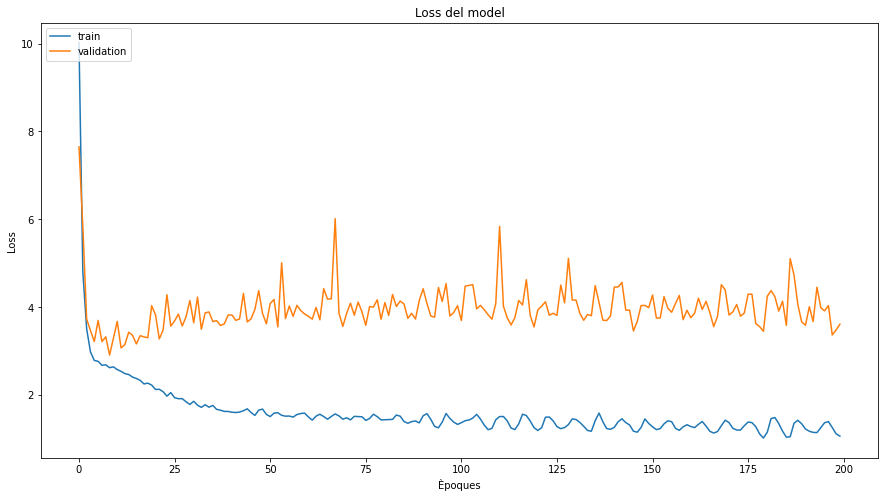

In [31]:
# Visualitzar accuracy
plt.figure(figsize=(15,8))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.figure(figsize=(15,8))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [13]:
test_loss, test_accuracy = model3.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

2023-04-16 11:30:13.172655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 3.7358 accuracy: 0.4185


In [22]:
# Càrrega del model
saved_model = load_model('/Users/esthersanroma/IT_ACADEMY/Models/model30.h5')

# Evaluació del model carregat amb dades de prova
test_loss, test_accuracy = saved_model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

2023-04-16 21:46:16.260013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 3.7795 accuracy: 0.4465


Amb aquest ultim model han millorat els resultats Test loss: 3.7795 accuracy: 0.4465 pero tampoc molt. haurem de fer un canvi de xarxa CNN, per veure si superem els resultats. 

In [15]:
predictions4 = model3.predict_generator(test_generator)
first20_preds = np.argmax(predictions4, axis=1)[:25]
first20_true = test_generator.labels[:25]
print(first20_preds)
print(first20_true)

2023-04-16 11:53:04.636093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[13  9 12  4 10 12  3  3  3 10  4  2 12  8 13 10  8  0 12  0  6  1  1  8
  8]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

[Text(0.5, 1.0, 'Confusion matrix')]

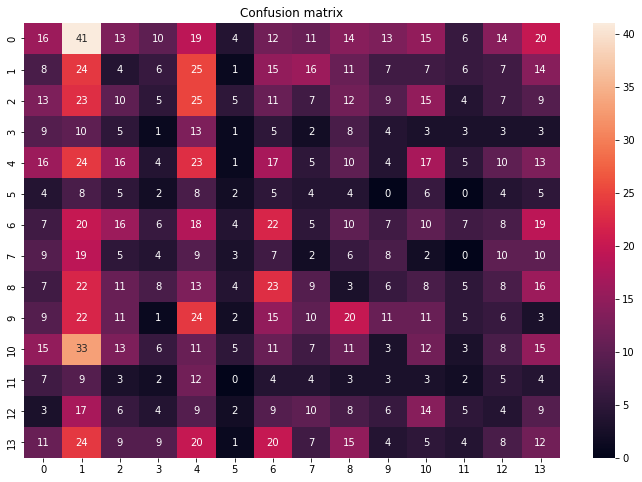

In [20]:
cf_matrix = confusion_matrix(test_generator.labels, np.argmax(predictions4, axis=1),labels=range(0,14))
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, fmt="d").set(title='Confusion matrix')

Probem un altra xarxa CNN, aquest cop 8 capes Conv, no utilitzarem L2, si utilitzarem BatchNormalization i dropout=0,5

In [2]:
model = Sequential()

# Afegim la primera capa convolucional i normalització
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())

# Afegim capes convolucionals i de pooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Afegim regularització
model.add(Dropout(0.25))

# Afegim més capes convolucionals i de pooling
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(2,2), strides=(2,2), activation='relu'))  # Modificació per solucionar l'error
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Afegim regularització
model.add(Dropout(0.5))

# Apliquem flatten per passar a una capa totalment connectada
model.add(Flatten())

# Afegim capes totalment connectades
model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Afegim l'última capa totalment connectada amb activació softmax per la classificació multiclasse
model.add(Dense(14, activation='softmax'))


# Compilem el model amb l'optimitzador Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 61, 61, 64)        0

In [7]:
# Defineix la ruta on es guardaran els models
save_dir = "/Users/esthersanroma/IT_ACADEMY/Models"
model_name = "model01.h5"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Defineix el callback ModelCheckpoint per guardar els models
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Entrena el model amb el callback ModelCheckpoint
history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=70, validation_data=val_generator, validation_steps=len(val_generator), callbacks=[checkpoint])

Epoch 1/70


2023-04-14 17:18:29.103616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 2.3434 - accuracy: 0.2221
Epoch 1: val_accuracy improved from -inf to 0.25433, saving model to /Users/esthersanroma/IT_ACADEMY/Models/model01.h5
200/200 [==============================] - 1195s 6s/step - loss: 2.3434 - accuracy: 0.2221 - val_loss: 2.2493 - val_accuracy: 0.2543
Epoch 2/70
200/200 [==============================] - ETA: 0s - loss: 2.3106 - accuracy: 0.2274
Epoch 2: val_accuracy did not improve from 0.25433
200/200 [==============================] - 1158s 6s/step - loss: 2.3106 - accuracy: 0.2274 - val_loss: 2.2508 - val_accuracy: 0.2392
Epoch 3/70
200/200 [==============================] - ETA: 0s - loss: 2.2670 - accuracy: 0.2462
Epoch 3: val_accuracy did not improve from 0.25433
200/200 [==============================] - 1146s 6s/step - loss: 2.2670 - accuracy: 0.2462 - val_loss: 2.2195 - val_accuracy: 0.2381
Epoch 4/70
200/200 [==============================] - ETA: 0s - loss: 2.2656 - accuracy: 0.2506
Epoch 4

Epoch 28/70
200/200 [==============================] - ETA: 0s - loss: 1.5596 - accuracy: 0.4785
Epoch 28: val_accuracy did not improve from 0.41558
200/200 [==============================] - 1090s 5s/step - loss: 1.5596 - accuracy: 0.4785 - val_loss: 1.8171 - val_accuracy: 0.4069
Epoch 29/70
200/200 [==============================] - ETA: 0s - loss: 1.5138 - accuracy: 0.4987
Epoch 29: val_accuracy did not improve from 0.41558
200/200 [==============================] - 1092s 5s/step - loss: 1.5138 - accuracy: 0.4987 - val_loss: 2.0509 - val_accuracy: 0.3788
Epoch 30/70
200/200 [==============================] - ETA: 0s - loss: 1.4768 - accuracy: 0.5066
Epoch 30: val_accuracy did not improve from 0.41558
200/200 [==============================] - 1093s 5s/step - loss: 1.4768 - accuracy: 0.5066 - val_loss: 2.0046 - val_accuracy: 0.3777
Epoch 31/70
200/200 [==============================] - ETA: 0s - loss: 1.4247 - accuracy: 0.5312
Epoch 31: val_accuracy did not improve from 0.41558
200/2

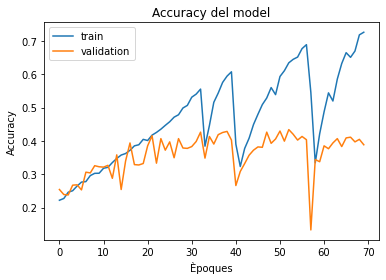

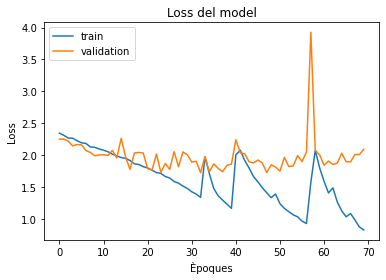

In [8]:
# Visualitzar accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy del model')
plt.ylabel('Accuracy')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Visualitzar loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del model')
plt.ylabel('Loss')
plt.xlabel('Èpoques')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

2023-04-15 15:23:16.207563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 2.1622 accuracy: 0.4058


In [13]:
from tensorflow.keras.models import load_model
# Càrrega del model
saved_model = load_model('/Users/esthersanroma/IT_ACADEMY/Models/model01.h5')

# Evaluació del model carregat amb dades de prova
test_loss, test_accuracy = saved_model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))




2023-04-15 15:26:45.422237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Test loss: 1.9077 accuracy: 0.4250


Els resultats no han millorat, la xarxa CNN era més complexa però això no ha fet que milloressin els resultats, el model anterior ha tingut millor resultats. 

In [93]:
predictions2 = model.predict_generator(test_generator)
first20_preds = np.argmax(predictions2, axis=1)[:25]
first20_true = test_generator.labels[:25]
print(first20_preds)
print(first20_true)

2023-04-13 08:24:17.774764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[ 6  9  0  1  1  9 12 13  0  4 13  0  2  0 13 10  6  0  2  9  0 10  9 13
  9]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[Text(0.5, 1.0, 'Confusion matrix')]

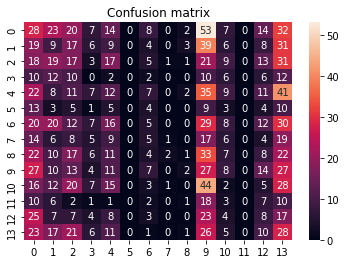

In [94]:
cf_matrix = confusion_matrix(test_generator.labels, np.argmax(predictions2, axis=1),labels=range(0,14))
sns.heatmap(cf_matrix, annot=True, fmt="d").set(title='Confusion matrix')


In [21]:
import os
import pandas as pd
from tensorflow.keras.models import load_model

# Define the list of models
models = ['/Users/esthersanroma/IT_ACADEMY/Models/model26.h5', # 4 capes Conv, L2 regularizer, 100 epochs
          '/Users/esthersanroma/IT_ACADEMY/Models/modell27.h5', # 4 capes Conv, L2 regularizer, Dropout=0,2
          '/Users/esthersanroma/IT_ACADEMY/Models/model30.h5', # 4 capes Conv, L2 regularizer, Dropout=0,2, BatchNormalization
          '/Users/esthersanroma/IT_ACADEMY/Models/model01.h5'] # 8 capes Conv, Dropout=0,5,BatchNormalization, 70 epochs

# Define the additional information
conv_layers_list = [4, 4, 4, 8]
regularizer_list = ["L2", "L2", "L2", "-"]
batchnorm_list = [False, False, True, True]
dropout_list = ["-", 0.2, 0.2, 0.5]
epochs_list = [100, 100, 200, 70]

# Define a dictionary to store the results
results = {'model': [], 'num_conv_layers': [], 'batchnorm': [], 'dropout': [], 'L2': [], 'epochs': [], 'test_loss': [], 'test_accuracy': []}

# Loop through the models
for i, model_path in enumerate(models):
    # Load the model
    model = load_model(model_path)
    
    # Get the number of convolutional layers
    num_conv_layers = conv_layers_list[i]
    
    # Get information about regularization, batch normalization, and dropout
    batchnorm = batchnorm_list[i]
    dropout = dropout_list[i]
    L2 = regularizer_list[i]
    
    # Get the number of epochs
    epochs = epochs_list[i]
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    
    # Add the results to the dictionary
    results['model'].append(os.path.basename(model_path))
    results['num_conv_layers'].append(num_conv_layers)
    results['batchnorm'].append(batchnorm)
    results['dropout'].append(dropout)
    results['L2'].append(L2)
    results['epochs'].append(epochs)
    results['test_loss'].append(test_loss)
    results['test_accuracy'].append(test_accuracy)

# Create a dataframe with the results
results_df = pd.DataFrame(results)

# Print the results
display(results_df)


2023-04-16 14:52:33.663760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-16 14:52:47.835020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-16 14:53:00.782098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-16 14:53:20.89

,model,num_conv_layers,batchnorm,dropout,L2,epochs,test_loss,test_accuracy
0,model26.h5,4,False,-,L2,100,3.606509,0.332784
1,modell27.h5,4,False,0.2,L2,100,2.033662,0.423943
2,model30.h5,4,True,0.2,L2,200,3.779453,0.446458
3,model01.h5,8,True,0.5,-,70,1.907737,0.425041


Aquesta tabla ens mostra el millor resultat obtingut fins al moment és model30.h5, amb 4 capes Conv, BatchNormalization,Kernel regularizer i dropout=0,2 

Crec que hauriem d'aumentar el números d'imatges per entrenar, i seguir entrenant amb la CNN del model30.h5 per poder millora els resultats. 